# Trabalho Final - Aprendizado de Máquina
Ianka Karúzia Rabelo de Oliveira - 365560

Trabalho Realizado com o Dataset Amazon Fine Food Review, disponível em: https://www.kaggle.com/snap/amazon-fine-food-reviews/data

Utilizando técnicas de NLP, para realizar Classificações

In [1]:
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando os Dados

In [2]:
con = sqlite3.connect('database.sqlite')

pd.read_sql_query("SELECT * FROM Reviews LIMIT 5", con)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Excluindo as Features Id, ProductId, UserId, ProfileName e Summary, além de renomear as Features HelpfulnessNumerator (VotesHelpful) e HelpfulnessDenominator (VotesTotal)

In [3]:
messages = pd.read_sql_query("""
SELECT 
  Score, 
  Summary, 
  HelpfulnessNumerator as VotesHelpful, 
  HelpfulnessDenominator as VotesTotal
FROM Reviews WHERE Score != 3""", con)

In [4]:
messages.head()

,Score,Summary,VotesHelpful,VotesTotal
0,5,Good Quality Dog Food,1,1
1,1,Not as Advertised,0,0
2,4,"""Delight"" says it all",1,1
3,2,Cough Medicine,3,3
4,5,Great taffy,0,0


In [5]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525814 entries, 0 to 525813
Data columns (total 4 columns):
Score           525814 non-null int64
Summary         525814 non-null object
VotesHelpful    525814 non-null int64
VotesTotal      525814 non-null int64
dtypes: int64(3), object(1)
memory usage: 16.0+ MB


In [6]:
messages['SummaryLenght'] = messages['Summary'].apply(len)

In [7]:
messages.head()

,Score,Summary,VotesHelpful,VotesTotal,SummaryLenght
0,5,Good Quality Dog Food,1,1,21
1,1,Not as Advertised,0,0,17
2,4,"""Delight"" says it all",1,1,21
3,2,Cough Medicine,3,3,14
4,5,Great taffy,0,0,11


### Análise dos Dados

In [8]:
sns.set_style('white')

#### Usando FaceGrid para criar 5 histogramas do tamanho das reviews de acordo com o valor de Score 

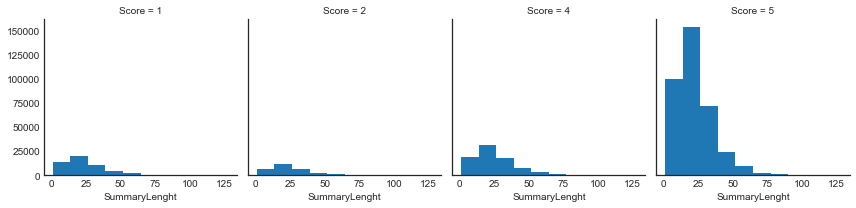

In [9]:
g = sns.FacetGrid(messages, col='Score')
g.map(plt.hist, 'SummaryLenght')

#### Countplot com a quantidade de cada tipo de Score

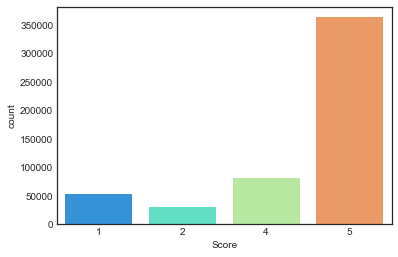

In [10]:
sns.countplot(x='Score', data=messages, palette='rainbow')

#### Utilizando GroupBy para pegar o valor médio das colunas numéricas

In [11]:
scores = messages.groupby('Score').mean()
scores

,VotesHelpful,VotesTotal,SummaryLenght
Score,,,
1,2.735211,4.869825,24.467303
2,1.859014,3.102724,24.899728
4,1.390292,1.666084,24.828988
5,1.675228,1.874108,22.563728


#### Criando um Heatmap baseado nos valores de correlação (.corr) dos dados da variável scores

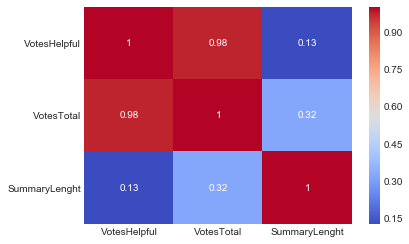

In [12]:
sns.heatmap(scores.corr(), cmap='coolwarm', annot=True)

#### Adicionando a coluna Sentiment que transforma os dados de Score em 1 (Score positivas, ou seja, 4 e 5) e 0 (Scores negativas, 1 e 2)

In [13]:
messages["Sentiment"] = messages["Score"].apply(lambda score: 1 if score > 3 else 0)

#### Na coluna Usefulness foram utilizados os valores das colunas VotesHelpful e VotesTotal para verificar se uma review foi útil (indicado pelo 1) ou não (indicado pelo 0)

In [14]:
messages["Usefulness"] = (messages["VotesHelpful"]/messages["VotesTotal"]).apply(lambda n: 1 if n > 0.8 else 0)

In [15]:
messages[messages.Score == 1].head()

,Score,Summary,VotesHelpful,VotesTotal,SummaryLenght,Sentiment,Usefulness
1,1,Not as Advertised,0,0,17,0,0
12,1,My Cats Are Not Fans of the New Food,1,1,36,0,1
26,1,Nasty No flavor,0,1,15,0,0
47,1,Don't like it,0,7,13,0,0
57,1,stale product.,2,2,14,0,1


In [16]:
messages[messages.Score == 5].head()

,Score,Summary,VotesHelpful,VotesTotal,SummaryLenght,Sentiment,Usefulness
0,5,Good Quality Dog Food,1,1,21,1,1
4,5,Great taffy,0,0,11,1,0
6,5,Great! Just as good as the expensive brands!,0,0,45,1,0
7,5,"Wonderful, tasty taffy",0,0,22,1,0
8,5,Yay Barley,1,1,10,1,1


#### Excluindo a Feature TextLenght, visto que ela apresentou baixa correlação com os Scores

In [17]:
messages.drop(['SummaryLenght'], inplace=True, axis=1)

In [18]:
messages.head()

,Score,Summary,VotesHelpful,VotesTotal,Sentiment,Usefulness
0,5,Good Quality Dog Food,1,1,1,1
1,1,Not as Advertised,0,0,0,0
2,4,"""Delight"" says it all",1,1,1,1
3,2,Cough Medicine,3,3,0,1
4,5,Great taffy,0,0,1,0


### Processamento dos Dados Textuais

In [19]:
import spacy

In [20]:
nlp = spacy.load('en')

#### Mostrando o que acontece no processamento em uma amostra do dados

In [21]:
review = messages['Summary'][0]
review

'Good Quality Dog Food'

In [22]:
parsed_review = nlp(review)
parsed_review

Good Quality Dog Food

#### Apesar do Texto não ter sido alterado, o SpaCy já identificou as caracteristicas do texto (Frases, Entidades)

In [23]:
for num, entity in enumerate(parsed_review.sents):
    print('Entity {}:'.format(num + 1), entity, '-', entity.label_)
    print('')

Entity 1: Good Quality Dog Food - 



#### Função para Processamento dos textos

In [93]:
def text_process(review):
    # parse the review text with spaCy
    review_lower = review.lower()
    parsed_review = nlp(review_lower)
    
    # remove punctuation and whitespace
    unigram_review = [token for token in parsed_review if not token.is_punct or token.is_space]
    
    
    # remove any remaining stopwords
    unigram_review = [term for term in unigram_review if not term.is_stop]
    review_final = ' '.join(map(str,unigram_review))
    return review_final

In [94]:
text_process(review)

'good quality dog food'

In [97]:
#messages["Summary_Clean"] = messages["Summary"].apply(text_process)
#Carregar o Arquivo do documento summary_clean.txt

In [27]:
from wordcloud import WordCloud

In [29]:
stopwords = nlp.Defaults.stop_words
plt.rcParams['font.size']=12        
plt.rcParams['savefig.dpi']=100 
plt.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

#### WorldCloud para Piores Avaliações (Score == 1)

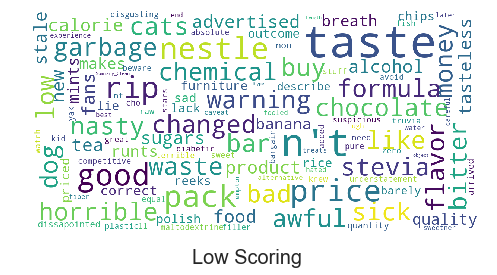

In [98]:
show_wordcloud(messages[messages.Score == 1]["Summary_Clean"], title = "Low Scoring")

#### WordCloud para Melhores Avaliações (Score == 5)

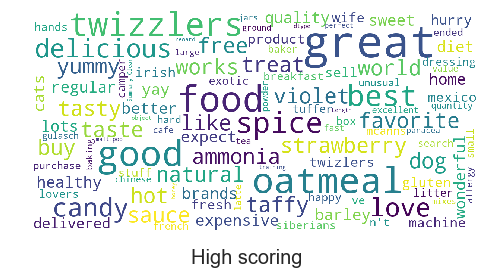

In [99]:
show_wordcloud(messages[messages.Score == 5]["Summary_Clean"], title = "High scoring")

## Predição do Sentimento da Review

#### Definindo Summary_Clean como X e y como Sentiment

In [109]:
from sklearn.model_selection import train_test_split

In [106]:
X = messages['Summary_Clean']
y = messages['Sentiment']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)